In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [5]:
color = { # uncertainty method
    '_' : 'black',
    'Entropy' : 'blue',
    'MarginSampling' : 'red',
    'VarRatio' : 'darkmagenta',
    'LossPrediction' : 'green'
}

marker_style = { # selection method
    'random' : '.',
    'maximum' : 's',
    'batch' : 'o',
    'CoreSet' : '^'
    }

In [9]:
names = [
#    'Entropy_batch',
    'Entropy_maximum',
    'LossPrediction_maximum',
#    'Entropy_CoreSet',
    'VarRatio_maximum',
    'MarginSampling_maximum',
    'random'
]

n_repeat = 3
n_sel = 1000
n_round = 10

80.21333333333332
80.28333333333335
79.99666666666667
80.13666666666667
77.41000000000001


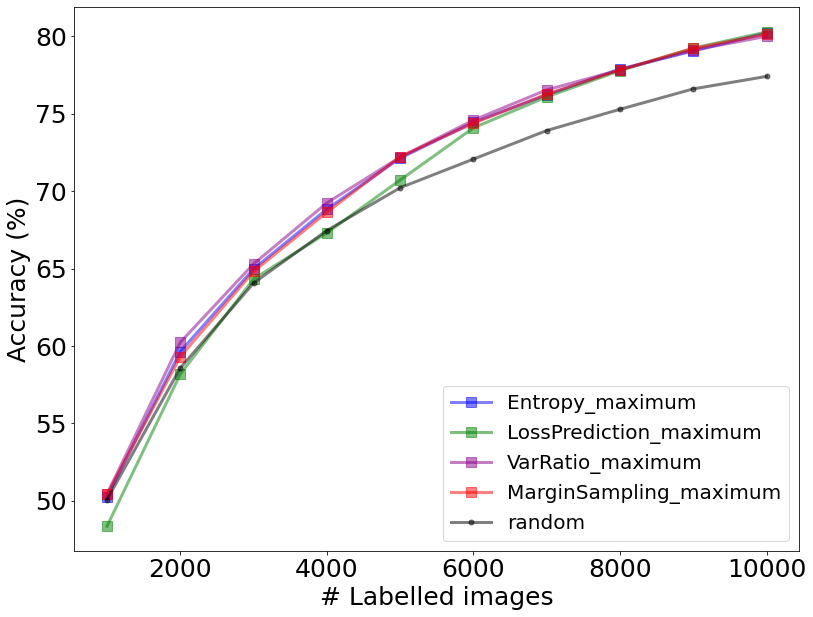

In [30]:
fig, ax1 = plt.subplots(figsize=(13,10))
ax1.set_ylabel('Accuracy (%)', fontsize=25)
ax1.set_xlabel('# Labelled images', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)

for name in names:
    res = [] 
    for ir in range(n_repeat):
        with open(f'output/{n_sel}/{name}_{ir}.json', 'r') as f:
            res.append( json.load(f) )
    res = np.array(res)
    n_sel_array = np.linspace(n_sel, n_sel*n_round, n_round)
    
    if name == 'random':
        sel_method = 'random'
        unc_method = '_'
    else:
        name_split = name.split('_')
        sel_method = name_split[1]
        unc_method = name_split[0]
        
    ax1.plot(n_sel_array, res.mean(axis=0), color=color[unc_method],
             marker=marker_style[sel_method], label=name, alpha=0.5,
            linewidth=3, markersize=10)
    ax1.legend(fontsize=20)  
    print(res.mean(axis=0)[-1])
